# Parte 1: Programación funcional

In [1]:
from Prices import get_prices
from Returns import get_returns
from Tsplot import get_tsplot

## Precios

In [2]:
symbols = symbols = [
    "AAPL",
    "MSFT",
    "AMZN",
    "GOOG",
    "XOM",
    "SNP",
    "EC",
    "TPL",
    "PFE",
    "NVS",
]

start = '2010-01-01'
end = '2022-08-12'
intervals = '1d'

prices = get_prices(symbols, start, end, intervals)

In [3]:
prices

,AAPL,AMZN,EC,GOOG,MSFT,NVS,PFE,SNP,TPL,XOM
Date,,,,,,,,,,
2010-01-04,6.526020,6.695000,12.046005,15.610239,23.749815,29.221478,11.223429,31.044287,26.051773,42.336403
2010-01-05,6.537304,6.734500,12.036331,15.541497,23.757486,29.193701,11.063350,30.715830,27.527411,42.501713
2010-01-06,6.433320,6.612500,12.094362,15.149715,23.611691,29.088171,11.027770,31.150240,26.829834,42.869057
2010-01-07,6.421425,6.500000,12.128216,14.797037,23.366133,28.832664,10.986272,30.662853,26.606255,42.734371
2010-01-08,6.464118,6.676000,12.253942,14.994298,23.527275,29.065947,11.075201,30.772337,25.935511,42.562923
...,...,...,...,...,...,...,...,...,...,...
2022-08-05,165.350006,140.800003,10.310000,118.220001,282.310760,85.570000,49.270000,45.230000,1656.819946,87.598862
2022-08-08,164.869995,139.410004,10.700000,118.139999,279.726257,85.940002,49.570000,46.060001,1710.939941,88.094055
2022-08-09,164.919998,137.830002,10.780000,117.500000,281.702057,87.150002,49.779999,46.830002,1711.000000,89.718269


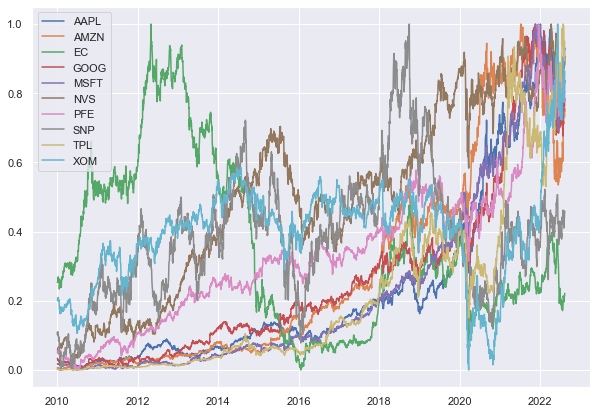

In [4]:
get_tsplot(time_series=prices,dates=prices.index, labels=prices.columns,normalize=True)

## Retornos 

In [5]:
returns = get_returns(prices=prices)

In [6]:
returns

array([[ 1.72756602e-03,  5.88255308e-03, -8.03416464e-04, ...,
        -1.06366372e-02,  5.50964239e-02,  3.89707183e-03],
       [-1.60340948e-02, -1.82817318e-02,  4.80974110e-03, ...,
         1.40437961e-02, -2.56677772e-02,  8.60590040e-03],
       [-1.85063273e-03, -1.71596491e-02,  2.79520643e-03, ...,
        -1.57700183e-02, -8.36815409e-03, -3.14673444e-03],
       ...,
       [ 3.03241779e-04, -1.13982030e-02,  7.44881707e-03, ...,
         1.65791381e-02,  3.51020736e-05,  1.82693675e-02],
       [ 2.58573616e-02,  3.46534071e-02,  1.85361108e-03, ...,
         1.91992246e-03,  1.11879118e-02,  9.44860903e-03],
       [-4.44142486e-03, -1.44710325e-02,  1.74395958e-02, ...,
         5.52609569e-03,  8.25938228e-03,  2.85174170e-02]])

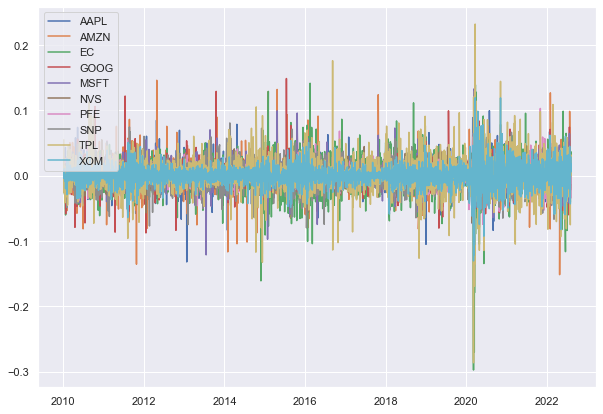

In [7]:
get_tsplot(time_series=returns,dates=prices.index[1:], labels=prices.columns,normalize=False)

# Parte 2: Teoría de portafolio 

¿Por qué surge la necesidad de  1) crear un portafolio y 2) optimizarlo?

Suponga que: como mal inversor por allá en el 2010 usted había visto el precio histórico de TPL (Texas Pacific Land), una operadora de bienes raíces con sede en Dallas, Texas. Debido a ese magnífico incremento usted decide invertir todo el patrimonio de su familia, digamos 100 unidades monetarias.

¿Cuál hubiese sido el "performance" o resultado de su inversión?

## Performance

In [8]:
import numpy as np
capital_inicial = 100

# Retorno de tpl diario desde 2010
r_tpl = returns[:,7]
n = len(r_tpl)
# Creamos un vector de ceros
performance = np.zeros((1, n)).T
performance[0] = capital_inicial
for i in range(n-1):
    performance[i+1] = performance[i] * np.exp(r_tpl[i])

performance

array([[100.        ],
       [ 98.94197318],
       [100.34129699],
       ...,
       [148.36868947],
       [150.84901851],
       [151.13891513]])

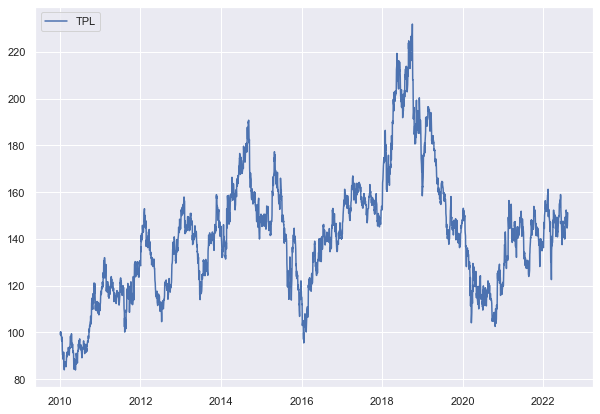

In [9]:
get_tsplot(time_series=performance, dates=prices.index[1:], labels=['TPL'], normalize=False)

### Drawdown máximo 

El máximo Drawdown mide que tanto se perdió desde el precio más alto al precio más bajo registrado luego del máximo

In [10]:
p_max = performance.max()
p_imax = performance.argmax()
p_after_pmax = performance[p_imax+1:,:]
p_min = p_after_pmax.min()

drawdawn = (p_max - p_min)/p_max
print(f"""
Drawdawn máximo : {round(drawdawn*100,2)}%
Es decir, en un determinado momento la estrategia perdió
el {round(drawdawn*100,2)}% del capital total
""")


Drawdawn máximo : 55.75%
Es decir, en un determinado momento la estrategia perdió
el 55.75% del capital total



Ahora suponga que usted como mal inversor asesoró a otras dos personas, pero en este caso les recomendó invertir en PFE y EC, construya el performance para cada activo, no es necesario que calcule el Drawdawn pero si es importante que grafique el resultado 

In [11]:
## Consejo:: construya una función get_performance() para que no repita código 

# Retornos de PFE
r_pfe = returns[:,8]

# Retornos de EC
r_ec = returns[:,6]

## Combinación lineal: lo mejor de dos mundos 

Ahora suponga que como buenos inversores que somos y aprendimos de nuestros errores ahora vamos a tomar una mejor decisión de inversión, tratando de "minimizar" el riesgo de perder todo el capital, diversificando nuestra inversión en TPL y en PFE ya que, TPL demostró un rendimiento muy alto pero con mucha volatilidad, sin embargo, PFE ha tenido un crecimiento constante al alza sin tanta volatilidad.

Diversificar nuestro portafolio implica que debemos repartir esas 100 unidades monetarias en ambos activos, ahora bien. ¿Cómo podríamos decidir que tanto invertir en TPL y que tanto en PFE? si por ejemplo quisieramos una rentabilidad promedio del 7%.

Bien, este ejercicio se puede resolver con un sistema de ecuaciones lineales de la forma:

\begin{align*}
    w_{tpl}r_{tpl} + w_{pfe}r_{pfe} = 7\%
\end{align*}

Si el retorno de TPL y PFE es, digamos: $r_{tpl} = 12\%$ y $r_{pfe} = 5\%$, será sencillo despejar cualquier $w_{i}$, por ejemplo $w_{pfe}$ sabiendo que $w_{tpl} = 1-w_{pfe}$ (ya que es una ponderación del 100%)

\begin{align*}
    w_{tpl}*r_{tpl} + w_{pfe}*r_{pfe} &= 7\%\\
    (1-w_{pfe})*r_{tpl} + w_{pfe}*r_{pfe} &= 7\%\\
    r_{tpl} - w_{pfe}*r_{tpl} + w_{pfe}*r_{pfe} &= 7\%\\
    w_{pfe}*(r_{pfe}-r_{tpl}) &= 7\% - r_{tpl}\\
    w_{pfe} &= \frac{7\% - r_{tpl}}{r_{pfe}-r_{tpl}}\\
    w_{pfe} &= \frac{7\% - 12\%}{5\%-12\%} = \frac{0.07-0.12}{0.05-0.12}\\
    w_{pfe} &= 71.42\% = 0.7142
\end{align*}

Por tanto $w_{tpl} = 1 - 0.7142 = 0.2357$ 

In [93]:
##
r_target = 0.07

r_tpl = 0.12
r_pfe = 0.05

w_pfe1 = (r_target-r_tpl)/(r_pfe-r_tpl)
w_tpl1 = 1-w_pfe1

resultado1 = w_tpl1*r_tpl + w_pfe1*r_pfe
resultado1

0.07

¿Pero y que pasa cuando tenemos más de un retorno... un vector de retornos, digamos ... de 2 retornos para cada activo...?
por ejemplo $r_{pfe} = \{0.05, 0.09\}$ y $r_{tpl} = \{0.12, 0.08\}$

En ese caso tendríamos que resolver un sistema de 2 ecuaciones lineales simultáneas, de la forma:

\begin{align*}
    w_{tpl}*0.12 + w_{pfe}*0.05 &= 0.07\\
    w_{tpl}*0.08 + w_{pfe}*0.09 &= 0.07\\
\end{align*}

Podríamos resolver este problema con diversas técnicas, no obstante note que puedo reescribir este sistema de ecuaciones en su forma matricial:

\begin{align*}
    \left[
    \begin{matrix*}
         0.12 & 0.05\\
         0.08 & 0.09\\
    \end{matrix*}
    \right]_{2 \times 2}
    \times
    \left[
    \begin{matrix*}
        w_{tpl}\\
        w_{pfe}
    \end{matrix*}
    \right]_{2\times 1}
    &=
    \left[
    \begin{matrix*}
        0.07 \\
        0.07 \\
    \end{matrix*}
    \right]_{2 \times 1}\\
    \left[
    \begin{matrix*}
        w_{tpl}\\
        w_{pfe}
    \end{matrix*}
    \right]_{2\times 1}
    &=
    \left[
    \begin{matrix*}
         0.12 & 0.05\\
         0.08 & 0.09\\
    \end{matrix*}
    \right]_{2 \times 2}^{-1}
    \times
    \left[
    \begin{matrix*}
        0.07 \\
        0.07 \\
    \end{matrix*}
    \right]_{2 \times 1}
\end{align*}

Es decir, debemos multiplicar la matriz inversa de nuestros retornos por el vector de retorno deseado o esperado

In [95]:
R = np.array([[0.12,0.05],[0.08,0.09]])
R_target = np.array([0.07,0.07]).reshape((2,1))

W = np.linalg.inv(R) @ R_target
w_tpl2 = W[0,0]
w_pfe2 = W[1,0]


resultado2 = R @ W
resultado2

array([[0.07],
       [0.07]])

## Óptimo: ¿Qué es eso y cómo se come?

Graficamente ya vimos que podemos hacer infinitas combinaciones lineales entre 2 o más activos, pero ¿Cómo sabemos cuál es la mejor combinación lineal?... bueno matemáticamente un punto óptimo es el punto máximo o mínimo de una función. Note que nosotros pusimos un retorno objetivo arbitrariamente del $7\%$ pero sabemos que haciendo infinitas combinaciones lineales podemos alcanzar diferentes retornos. Entonces nuestro problema podría ser hallar la combinación lineal que nos dé el máximo retorno posible.

### Retorno máximo y primera restricción

Note que, cuando resolvimos el problema con dos ecuaciones lineales ambas ponderaciones $w_{i}$ nos daban lo mismo $0.411..$, pero al sumarlas el resultado era mayor a $1$, esto en finanzas puede verse como "apalancamiento", pero por el momento nosotros no vamos a coniderar ese tipo de problema, por ende nuestra primera restricción es asumir que $w_{1}+w_{2}=1$

Ahora, nuestra función a optimizar es el retorno del portafolio, dada por:
\begin{align*}
    R_{p} = w_{1}*r_{1} + w_{2}*r_{2}
\end{align*}

Sujeto a que si o si $w_{1}+w_{2}=1$, reescribiendo nuestro problema queda:

\begin{align*}
    \max &\quad R_{p} = w_{1}*r_{1} + w_{2}*r_{2}\\
    \text{s.a} &\quad w_{1}+w_{2} = 1
\end{align*}

#### Solución optimización restringida por aproximación

Note que debemos maximiar $R_{p}$ modificando solo $w_{1}$ y $w_{2}$ ya que $r_{1}$ y $r_{2}$ están dado, bien lo que podríamos hacer es aproximar la solución asignando ponderaciones aribitrariamente.

Supongamos 100 retornos aleatorios para cada activo

In [6]:
import pandas as pd
import numpy as np
np.random.seed(14)
r1,r2 = np.random.normal(0,0.05,(2,100))
w1 = np.linspace(0,1,100)
w2 = 1-w1

Rp = w1*r1 + w2*r2
Rmax = Rp.max()
print(f"""
El retorno máximo: {Rmax},
se logra con:
    w1 = {w1[Rp.argmax()]},
    w2 = {w2[Rp.argmax()]}, 
    w1+w2 = 1
""")



El retorno máximo: 0.11499931464337966,
se logra con:
    w1 = 0.5656565656565657,
    w2 = 0.43434343434343425, 
    w1+w2 = 1



In [7]:
pd.DataFrame(
    {
        'r1': pd.Series(r1),
        'w1': pd.Series(w1),
        'r2': pd.Series(r2),
        'w2': pd.Series(w2),
        'Rp': pd.Series(Rp)
    },
    columns=["r1","w1","r2","w2","Rp"]
)

,r1,w1,r2,w2,Rp
0,0.077567,0.000000,-0.019672,1.000000,-0.019672
1,0.003959,0.010101,-0.031938,0.989899,-0.031576
2,0.008699,0.020202,-0.001930,0.979798,-0.001716
3,-0.003617,0.030303,0.033560,0.969697,0.032434
4,-0.100216,0.040404,0.008809,0.959596,0.004404
...,...,...,...,...,...
95,-0.056656,0.959596,0.018064,0.040404,-0.053637
96,0.074238,0.969697,-0.069681,0.030303,0.069877
97,-0.025533,0.979798,0.002286,0.020202,-0.024971
98,-0.022411,0.989899,0.000585,0.010101,-0.022179


### Riesgo mínimo y primera restricción

Así como podemos maximizar el retorno, podemos minimizar el riesgo de nuestro portafolio, la función que debemos minimizar es la varianza del portafolio dada por:

\begin{align*}
    \sigma^{2}_{p} &= w_{1}^{2}\sigma_{1}^{2}+w_{2}^{2}\sigma_{2}^{2} + 2w_{1}w_{2}\sigma_{1,2}
\end{align*}

Donde $\sigma_{1,2}$ es la covarianza del activo $1$ con el activo $2$

\begin{align*}
    \min &\quad \sigma^{2}_{p} = w_{1}^{2}\sigma_{1}^{2}+w_{2}^{2}\sigma_{2}^{2} + 2w_{1}w_{2}\sigma_{1,2}\\
    \text{s.a} &\quad w_{1}+w_{2} = 1
\end{align*}

In [12]:
import pandas as pd
import numpy as np
np.random.seed(14)
r1,r2 = np.random.normal(0,0.05,(2,100))
w1 = np.linspace(0,1,100)
w2 = 1-w1

Sp = pow(w1,2)*r1.var() + pow(w2,2)*r2.var() + 2*w1*w2*np.cov(r1,r2)[0,1]
Smin = Sp.min()
print(f"""
El riesgo mínimo: {Smin},
se logra con:
    w1 = {w1[Sp.argmin()]},
    w2 = {w2[Sp.argmin()]}, 
    w1+w2 = 1
""")


El riesgo mínimo: 0.0012724569889861871,
se logra con:
    w1 = 0.494949494949495,
    w2 = 0.505050505050505, 
    w1+w2 = 1



In [13]:
## Pero consideremos que pasa con el retorno con esta solución
Rp_ = Rp[Sp.argmin()]
Rp_ 

-0.015577512480474358

In [14]:
pd.DataFrame(
    {
        'r1': pd.Series(r1),
        'w1': pd.Series(w1),
        'r2': pd.Series(r2),
        'w2': pd.Series(w2),
        'Rp': pd.Series(Rp),
        'Sp': pd.Series(Sp),
    },
    columns=["r1","w1","r2","w2","Rp","Sp"]
)

,r1,w1,r2,w2,Rp,Sp
0,0.077567,0.000000,-0.019672,1.000000,-0.019672,0.002653
1,0.003959,0.010101,-0.031938,0.989899,-0.031576,0.002598
2,0.008699,0.020202,-0.001930,0.979798,-0.001716,0.002544
3,-0.003617,0.030303,0.033560,0.969697,0.032434,0.002491
4,-0.100216,0.040404,0.008809,0.959596,0.004404,0.002439
...,...,...,...,...,...,...
95,-0.056656,0.959596,0.018064,0.040404,-0.053637,0.002442
96,0.074238,0.969697,-0.069681,0.030303,0.069877,0.002494
97,-0.025533,0.979798,0.002286,0.020202,-0.024971,0.002547
98,-0.022411,0.989899,0.000585,0.010101,-0.022179,0.002601


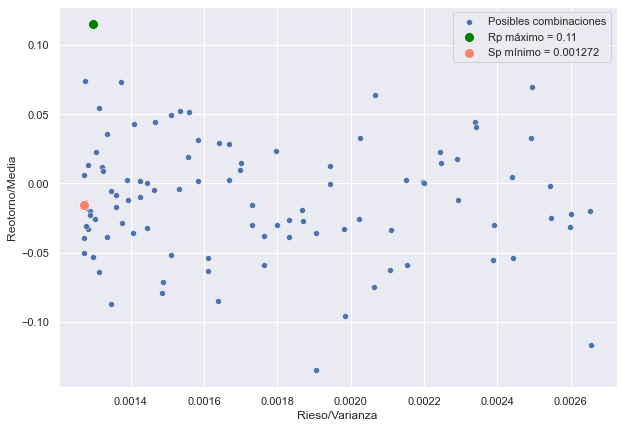

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

fig = plt.figure(figsize=(10,7))
sns.scatterplot(x=Sp,y=Rp)
sns.scatterplot(x=[Sp[Rp.argmax()]],y=[Rp.max()],s=100,color='green')
sns.scatterplot(x=[Sp.min()],y=[Rp[Sp.argmin()]],s=100,color='salmon')
plt.legend(['Posibles combinaciones',f'Rp máximo = {round(Rmax,2)}',f'Sp mínimo = {round(Smin,6)}'],loc='upper right',)
plt.xlabel("Rieso/Varianza")
plt.ylabel("Reotorno/Media")
plt.show()

### Riesgo Mínimo, primer y segunda restricción

\begin{align*}
    \min_{w_{1}w_{2}} &\quad \sigma^{2}_{p} = w_{1}^{2}\sigma_{1}^{2}+w_{2}^{2}\sigma_{2}^{2} + 2w_{1}w_{2}\sigma_{1,2}\\
    \text{s.a} &\quad w_{1}r_{1}+w_{2}r_{2} = R_{p}\\
                &\quad w_{1}+w_{2} = 1
\end{align*}
